WEATHER ANALYSIS - DATA VISUALIZATION

This brief notebook wants to show how to plot some simple charts related to the average tempereature in Celsius degrees that have changed during the past 20 years, in the city of Verona (Italy).
For the visualization also phenomenas are considered. In particular rain precipitations are analyzed since in the Italian weather archives the millimiters per day are reported but unfortunately rain millimiters are recorded from 2004 until 2009.

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

This first part of code concerns data preparation for data visualization.
First of all the csv comeing from data cleaning part (Raw_Df_Data Cleaning.ipynb). 
Irrelevant column is deleted and the cast of the remaining datas is done.

This because by reading again the csv file, the csv reader formats all the columns authomatically.

In [2]:
# read dataframe
df_ts = pd.read_csv(r'Weather_df.csv')
df_ts.head(3)

,Unnamed: 0,City,Date,AVG Temperature °C,MIN Temp °C,MAX Temp °C,Dew point,Humidity,Visibility km,AVG Wind km/h,MAX Wind km/h,Wind gust km/h,Pressure mb,AVG Pressure mb,Rain mm,Phenomenas
0,0,Verona,2004-01-01,6.4,4.0,9.4,0.7,67.0,12.0,4.0,13.0,0.0,0.0,0.0,0.0,rain
1,1,Verona,2004-01-02,5.4,2.0,7.4,-1.9,59.0,11.0,14.0,26.0,0.0,0.0,0.0,0.8,rain
2,2,Verona,2004-01-03,3.1,-0.8,7.0,-3.9,60.0,11.0,3.0,9.0,0.0,0.0,0.0,0.0,NaN


In [3]:
df_ts= df_ts.drop(df_ts.columns[0],axis=1)

To ease data visualization, rows where datas are nan are dropped (see point 12) and 13) of Raw_Df_Data Cleanin.ipynb )

In [4]:
df_ts.drop(df_ts[df_ts['AVG Temperature °C'].isnull()].index, inplace=True)

In [5]:
df_ts.reset_index(inplace=True,drop=True)

In [6]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7150 entries, 0 to 7149
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                7150 non-null   object 
 1   Date                7150 non-null   object 
 2   AVG Temperature °C  7150 non-null   float64
 3   MIN Temp °C         7150 non-null   float64
 4   MAX Temp °C         7150 non-null   float64
 5   Dew point           7150 non-null   float64
 6   Humidity            7150 non-null   float64
 7   Visibility km       7150 non-null   float64
 8   AVG Wind km/h       7150 non-null   float64
 9   MAX Wind km/h       7150 non-null   float64
 10  Wind gust km/h      7150 non-null   float64
 11  Pressure mb         7150 non-null   float64
 12  AVG Pressure mb     7150 non-null   float64
 13  Rain mm             7150 non-null   float64
 14  Phenomenas          3263 non-null   object 
dtypes: float64(12), object(3)
memory usage: 838.0+ KB


In [7]:
# cast columns into the correct dtype
df_ts['Visibility km']=df_ts['Visibility km'].astype(pd.Int64Dtype(), errors='ignore')
df_ts['AVG Wind km/h']=df_ts['AVG Wind km/h'].astype(pd.Int64Dtype(), errors='ignore')
df_ts['MAX Wind km/h']=df_ts['MAX Wind km/h'].astype(pd.Int64Dtype(), errors='ignore')
df_ts['Wind gust km/h']=df_ts['Wind gust km/h'].astype(pd.Int64Dtype(), errors='ignore')
df_ts['Date']=pd.to_datetime(df_ts['Date'])

In [8]:
# df_ts.info()

Four more columns are created for grouping data coming next: date is splitted in the corresponding year, month and season.  

In [9]:
# create two columns with the corresponding 'year' and 'month'
df_ts['year'] = df_ts['Date'].dt.year
df_ts['month'] = df_ts['Date'].dt.month
df_ts['month name'] =[i.strftime('%b') for i in df_ts['Date']]

In [10]:
# append column with corresponding season
season = []
for i in df_ts['Date']:
    if i.strftime('%m-%d')>= '06-21' and i.strftime('%m-%d')< '09-23':
        s = 'summer'
        season.append(s)
    if i.strftime('%m-%d')>= '09-23' and i.strftime('%m-%d')< '12-22':
        a = 'autumn'
        season.append(a)
    if  i.strftime('%m-%d')>= '12-22' and i.strftime('%m-%d')<= '12-31':
        w = 'winter'
        season.append(w)
    if  i.strftime('%m-%d')>= '01-01' and i.strftime('%m-%d')< '03-20':
        w = 'winter'
        season.append(w)
    if i.strftime('%m-%d')>= '03-20' and i.strftime('%m-%d')< '06-21':
        sp = 'spring'
        season.append(sp)      
df_ts['season']=season  

In [11]:
df_ts

,City,Date,AVG Temperature °C,MIN Temp °C,MAX Temp °C,Dew point,Humidity,Visibility km,AVG Wind km/h,MAX Wind km/h,Wind gust km/h,Pressure mb,AVG Pressure mb,Rain mm,Phenomenas,year,month,month name,season
0,Verona,2004-01-01,6.4,4.0,9.4,0.7,67.0,12,4,13,0,0.0,0.0,0.0,rain,2004,1,Jan,winter
1,Verona,2004-01-02,5.4,2.0,7.4,-1.9,59.0,11,14,26,0,0.0,0.0,0.8,rain,2004,1,Jan,winter
2,Verona,2004-01-03,3.1,-0.8,7.0,-3.9,60.0,11,3,9,0,0.0,0.0,0.0,NaN,2004,1,Jan,winter
3,Verona,2004-01-04,1.3,-3.0,9.0,-4.8,64.0,11,4,11,0,0.0,0.0,0.0,NaN,2004,1,Jan,winter
4,Verona,2004-01-05,-2.1,-5.0,-1.0,-2.4,98.0,3,4,9,0,0.0,0.0,0.0,fog,2004,1,Jan,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,Verona,2023-09-03,24.0,17.0,29.0,17.0,68.0,18,8,22,0,1021.0,0.0,0.0,NaN,2023,9,Sep,summer
7146,Verona,2023-09-04,24.0,19.0,29.0,18.0,67.0,21,7,15,0,1022.0,0.0,0.0,NaN,2023,9,Sep,summer
7147,Verona,2023-09-05,23.0,18.0,27.0,12.0,52.0,22,10,18,0,1022.0,0.0,0.0,NaN,2023,9,Sep,summer
7148,Verona,2023-09-06,22.0,16.0,29.0,13.0,59.0,18,6,11,0,1021.0,0.0,0.0,NaN,2023,9,Sep,summer


For precipitation data visualizaition all types of phenomenas are checked. 
For "snow" phenomena millimiters are not recorded so it is not considered for the graphs.
Dataframe is filtered only for "rain" phenomenas where also "Rain mm" are registered (only from 2004 til 2009 as above mentionned).

In [12]:
# check all phenomenas type reported in the archive
df_ts.Phenomenas.unique()

array(['rain', nan, 'fog', 'snow fog', 'rain snow fog', 'rain and fog',
       'rain snow', 'rain thunderstorm', 'thunderstorm', 'snow',
       'thunderstorm fog', 'rain thunderstorm fog', 'rain hail'],
      dtype=object)

In [13]:
# check if snow quantity is recorded
df_ts[df_ts['Phenomenas']=='snow']['Rain mm'].unique()

array([0.])

In [14]:
# create a dataframe of only precipitation (rain) where quantity (Rain mm) is recorded
df_ts['Phenomenas'].fillna('absent', inplace=True)
df_p = df_ts[df_ts['Phenomenas'].str.contains('rain')]
df_p = df_p[df_p['Rain mm']!=0.0]
print(df_p['Rain mm'].unique())
df_p = df_p.copy()
df_p.info()

[ 0.8  3.1  7.1 13.  11.9 16.  10.9  1.   9.1  8.9  5.6  0.5 17.   2.
 18.   4.8  2.8 31.  29.   5.1  4.1  9.9 36.1  7.9 42.9  6.1 15.   1.5
 25.9  3.8 54.1 35.1 24.4 23.9 20.8  4.6 19.1 25.2 14.  48.   2.5 11.4
 30.  36.6  5.8 17.8 23.1 14.5 27.2 32.8  7.6 16.5 58.2  3.6  6.6  1.8
 12.2 18.8  8.1 21.8 24.9 11.2  9.4 70.1 61.  27.9 24.1 13.2 19.6 21.1
 12.5 20.1 34.  10.4]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 1 to 2004
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   City                417 non-null    object        
 1   Date                417 non-null    datetime64[ns]
 2   AVG Temperature °C  417 non-null    float64       
 3   MIN Temp °C         417 non-null    float64       
 4   MAX Temp °C         417 non-null    float64       
 5   Dew point           417 non-null    float64       
 6   Humidity            417 non-null    float64       
 7   Visibilit

From first Dataframe 'df_ts' relevant temperature datas are grouped to plot the general average temperatures, the minimum average temperatures and the maximum average temperatures of the last 20 years.
Since the current year is not finished yet, the grouped dataframe is sliced taking into consideration periods until last year which is completed.

In [15]:
df_avg_t = df_ts.groupby(['year','month','month name'], as_index=False)[['AVG Temperature °C','MIN Temp °C','MAX Temp °C' ]].mean()
df_avg_t = df_avg_t[df_avg_t['year']<2023]
df_avg_t = df_avg_t.copy()

In [16]:
sns.set(rc={'figure.figsize':(12,7)})
sns.set(font_scale=1)

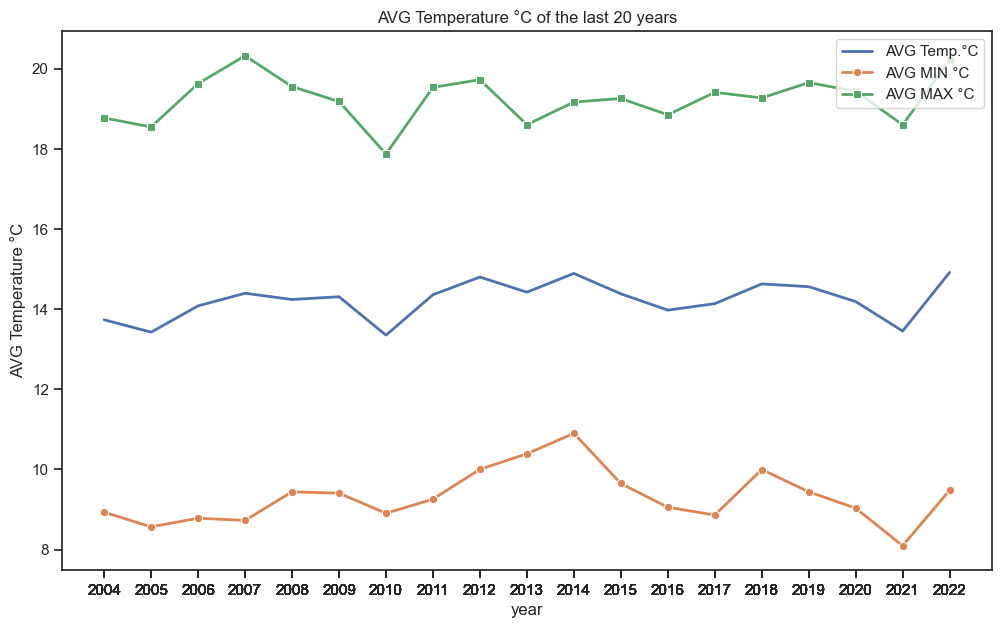

<Figure size 1200x700 with 0 Axes>

In [17]:
graph1 = sns.set_style('ticks')
graph1 = sns.lineplot(x='year', y='AVG Temperature °C' , linewidth=2, errorbar=None,label='AVG Temp.°C', data=df_avg_t)
graph1 = sns.lineplot(x='year', y='MIN Temp °C' ,  linewidth=2, errorbar=None,marker='o', label = 'AVG MIN °C',data=df_avg_t)
graph1 = sns.lineplot(x='year', y='MAX Temp °C' ,  linewidth=2, errorbar=None, marker='s', label='AVG MAX °C', data=df_avg_t)
graph1.set(xticks=df_avg_t['year'])
graph1= plt.title(label='AVG Temperature °C of the last 20 years')
graph1= plt.legend(loc='upper right')
plt.show()
plt.savefig('AVG_Temp_20y.jpg')

The second graph below shows the same information splitted by season (general average temperatures, the minimum average temperatures and the maximum average temperatures of the last 20 years). 

In [18]:
df_s= df_ts.groupby(['year','season'], as_index=False)[['AVG Temperature °C', 'MIN Temp °C','MAX Temp °C']].mean()
df_s=df_s[df_s['year']<2023]

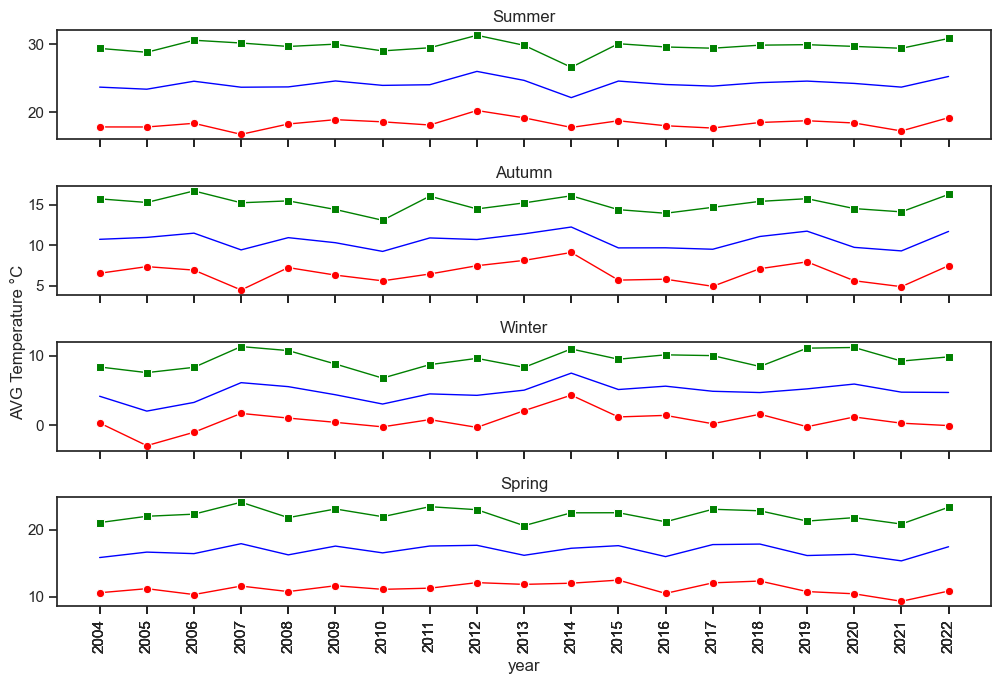

<Figure size 1200x700 with 0 Axes>

In [19]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots( ncols=1, nrows=4, sharex=True, sharey=False,figsize=(10,7))

plt.xticks(rotation=90)
sns.set(font_scale=1)

plt.ylabel('AVG Temperature °C')
plt.xticks(ticks=df_s['year'],rotation=90)
sns.set(font_scale=1)

sns.lineplot(ax=ax1, x='year',y= 'MAX Temp °C',color='green' , marker='s',linewidth=1,data=df_s[df_s['season']=='summer'])
sns.lineplot(ax=ax1, x='year',y= 'AVG Temperature °C',color='blue', linewidth=1,data=df_s[df_s['season']=='summer'])
sns.lineplot(ax=ax1, x='year',y= 'MIN Temp °C', color='red',marker='o',linewidth=1,data=df_s[df_s['season']=='summer'])
ax1.set_title(label='Summer')
ax1.set_ylabel(None)

sns.lineplot(ax=ax2, x='year',y= 'MAX Temp °C', color='green',marker='s', linewidth=1,data=df_s[df_s['season']=='autumn'])
sns.lineplot(ax=ax2, x='year',y= 'AVG Temperature °C',color='blue',linewidth=1,data=df_s[df_s['season']=='autumn'])
sns.lineplot(ax=ax2, x='year',y= 'MIN Temp °C',color='red',marker='o',linewidth=1,data=df_s[df_s['season']=='autumn'])
ax2.set_title(label='Autumn')
ax2.set_ylabel(None)

sns.lineplot(ax=ax3, x='year',y= 'MAX Temp °C', color='green', marker='s',linewidth=1,data=df_s[df_s['season']=='winter'])
sns.lineplot(ax=ax3, x='year',y= 'AVG Temperature °C',color='blue',linewidth=1,data=df_s[df_s['season']=='winter'])
sns.lineplot(ax=ax3, x='year',y= 'MIN Temp °C',color='red',marker='o',linewidth=1,data=df_s[df_s['season']=='winter'])
ax3.set_title(label='Winter')
ax3.set_ylabel(None)

sns.lineplot(ax=ax4, x='year',y= 'MAX Temp °C', color='green',marker='s',linewidth=1,data=df_s[df_s['season']=='spring'])
sns.lineplot(ax=ax4, x='year',y= 'AVG Temperature °C',color='blue',linewidth=1,data=df_s[df_s['season']=='spring'])
sns.lineplot(ax=ax4, x='year',y= 'MIN Temp °C',color='red',marker='o',linewidth=1,data=df_s[df_s['season']=='spring'])
ax4.set_title(label='Spring')
ax4.set_ylabel(None)

fig.text(0.001, 0.5, 'AVG Temperature °C', va='center', rotation='vertical')
fig.tight_layout()
plt.show()
plt.savefig('AVG_Seasonal_Temp_20y.jpg')

The third figure below wants to compare all the average temperatures for each year, splitted by general max avg temperature, avg temperature and min avg temperature.

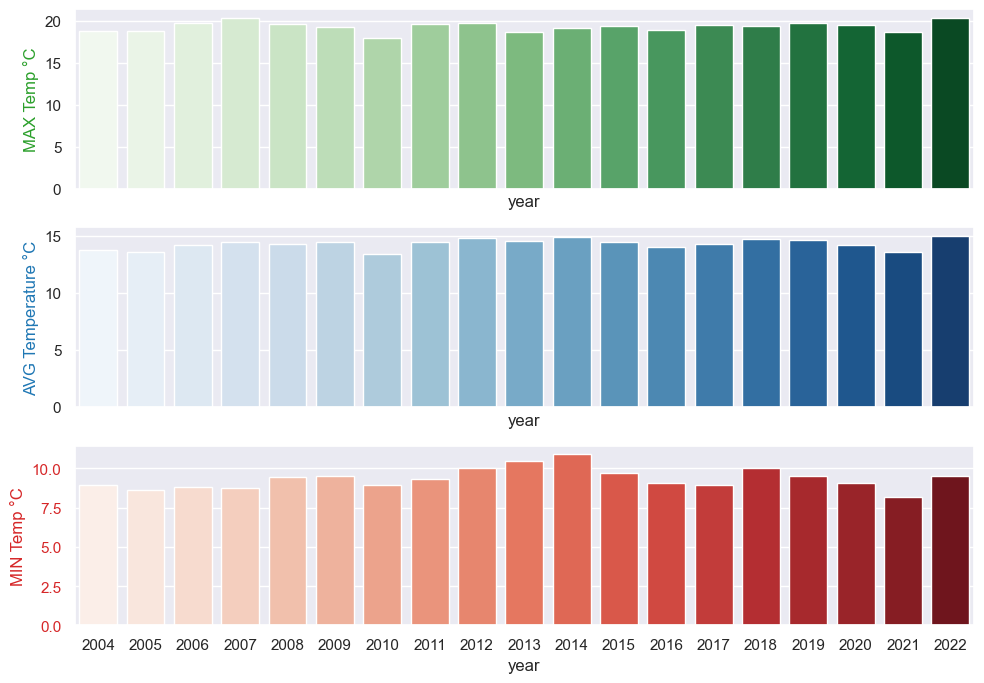

<Figure size 1200x700 with 0 Axes>

In [20]:
fig, (ax1,ax2,ax3) = plt.subplots( ncols=1, nrows=3, sharex=True, figsize=(10,7))

color1= 'tab:green'
ax1.set_ylabel('AVG MAX °C', color=color1)
sns.barplot(ax=ax1, x='year',y= 'MAX Temp °C', errorbar=None, palette='Greens', data=df_ts[df_ts['year']<2023])

color2 = 'tab:blue'
ax2.set_xlabel('Year')
ax2.set_ylabel('AVG °C', color=color2)
sns.barplot(ax=ax2,x='year',y= 'AVG Temperature °C', errorbar=None,palette='Blues', data=df_ts[df_ts['year']<2023])

color3= 'tab:red'
ax3.set_ylabel('AVG MIN °C', color=color3)  # we already handled the x-label with ax1
sns.barplot(ax=ax3, x='year',y= 'MIN Temp °C',errorbar=None, palette='Reds',data=df_ts[df_ts['year']<2023])
ax3.tick_params(axis='y', labelcolor=color3)

fig.tight_layout()
plt.show()
plt.savefig('AVG_Temp_20y_bars.jpg')

In this final part precipitations plots are shown to recap, for the available datas in the archive, the quantity in millimeters of rain for each year and the splitted by season again.

In [21]:
df_p.head()

,City,Date,AVG Temperature °C,MIN Temp °C,MAX Temp °C,Dew point,Humidity,Visibility km,AVG Wind km/h,MAX Wind km/h,Wind gust km/h,Pressure mb,AVG Pressure mb,Rain mm,Phenomenas,year,month,month name,season
1,Verona,2004-01-02,5.4,2.0,7.4,-1.9,59.0,11,14,26,0,0.0,0.0,0.8,rain,2004,1,Jan,winter
8,Verona,2004-01-09,3.9,2.6,6.3,2.8,93.0,2,5,11,0,0.0,0.0,3.1,rain,2004,1,Jan,winter
16,Verona,2004-01-17,4.4,2.0,6.6,1.3,80.0,7,7,22,0,0.0,0.0,3.1,rain,2004,1,Jan,winter
17,Verona,2004-01-18,5.9,2.0,7.0,2.4,78.0,11,23,54,57,0.0,0.0,7.1,rain,2004,1,Jan,winter
18,Verona,2004-01-19,5.3,2.0,10.0,2.6,83.0,7,7,15,0,0.0,0.0,7.1,rain,2004,1,Jan,winter


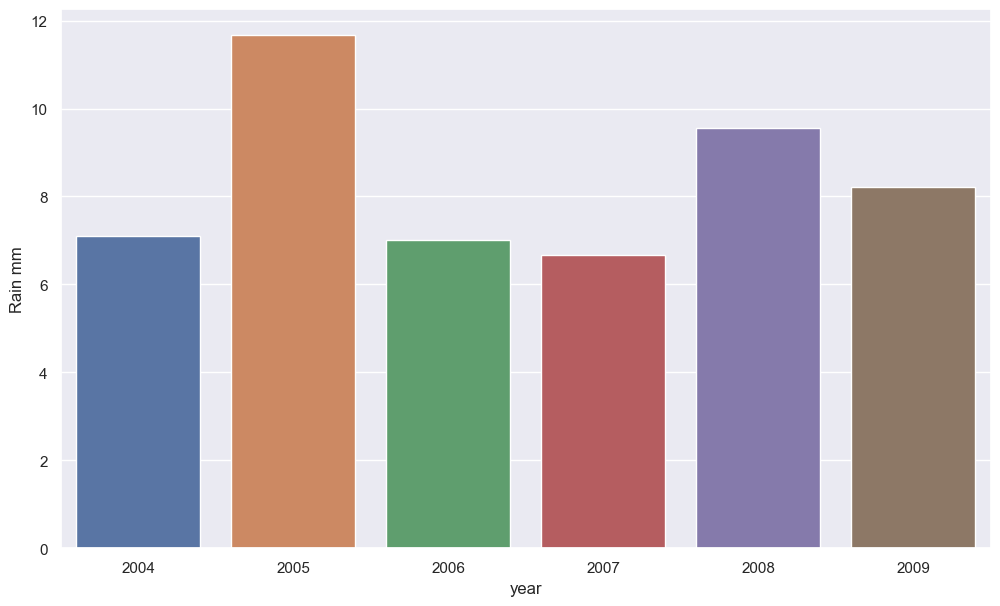

<Figure size 1200x700 with 0 Axes>

In [22]:
sns.set(rc={'figure.figsize':(12,7)})
sns.barplot( x='year',y='Rain mm',errorbar=None, data=df_p)
plt.show()
plt.savefig('Rain_mm.jpg')

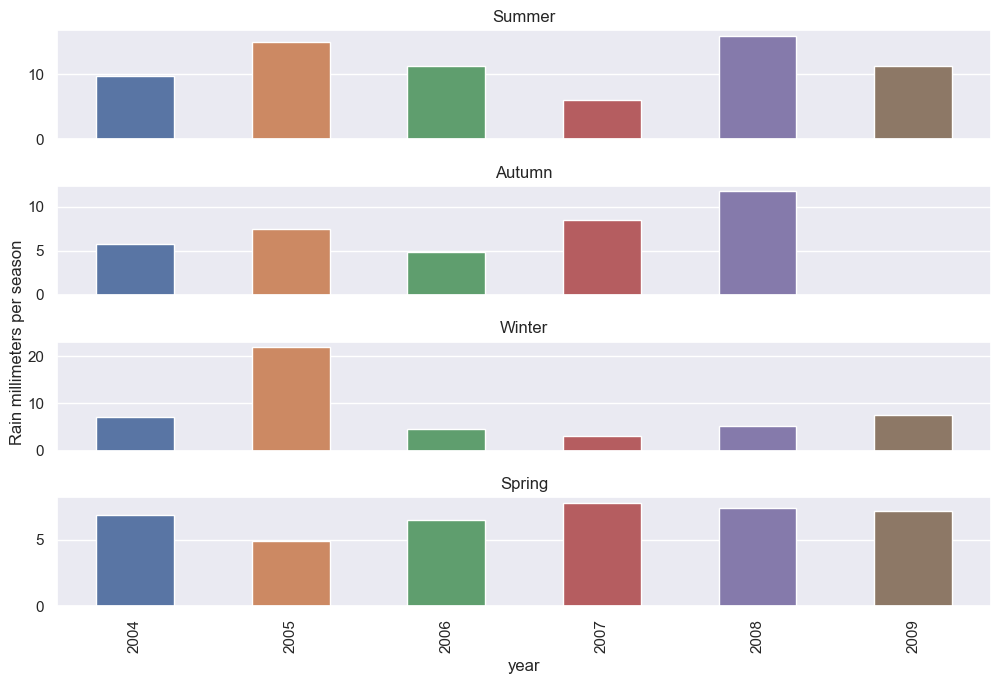

<Figure size 1200x700 with 0 Axes>

In [23]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots( ncols=1, nrows=4, sharex=True, sharey=False,figsize=(10,7))

plt.xticks(rotation=90)
sns.set(font_scale=1)

plt.ylabel('Rain mm')
plt.xticks(ticks=df_p['year'],rotation=90)
sns.set(font_scale=1)

sns.barplot(ax=ax1, x='year',y= 'Rain mm',width=0.5, errorbar=None, data=df_p[df_p['season']=='summer'])
ax1.set_title(label='Summer')
ax1.set_ylabel(None)
ax1.set_xlabel(None)

sns.barplot(ax=ax2, x='year',y= 'Rain mm',width=0.5, errorbar=None, data=df_p[df_p['season']=='autumn'])
ax2.set_title(label='Autumn')
ax2.set_ylabel(None)
ax2.set_xlabel(None)

sns.barplot(ax=ax3, x='year',y= 'Rain mm',width=0.5, errorbar=None, data=df_p[df_p['season']=='winter'])
ax3.set_title(label='Winter')
ax3.set_ylabel(None)
ax3.set_xlabel(None)

sns.barplot(ax=ax4, x='year',y= 'Rain mm', width=0.5, errorbar=None, data=df_p[df_p['season']=='spring'])
ax4.set_title(label='Spring')
ax4.set_ylabel(None)

fig.text(0.001, 0.5, 'Rain millimeters per season', va='center', rotation='vertical')
fig.tight_layout()
plt.show()
plt.savefig('Rain_mm_season.jpg')